In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#importing Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pickle

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2023-01-30 03:31:12.554153: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# !pip show sklearn
# !pip install numpy==1.18.5
# !pip install tensorflow==2.3.0

In [3]:
'''This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction 
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes) 
    and took their brain signal in these particular environments'''

#Reading dataset
datax = pd.read_csv("./emotions.csv")

In [4]:
#chceking length of dataset
len(datax)
data = datax[:2000]

data_test = datax[2000:]
data_test = data_test.drop(['label'], axis=1)

data_test.to_json('data_test.json', orient='records')

In [5]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

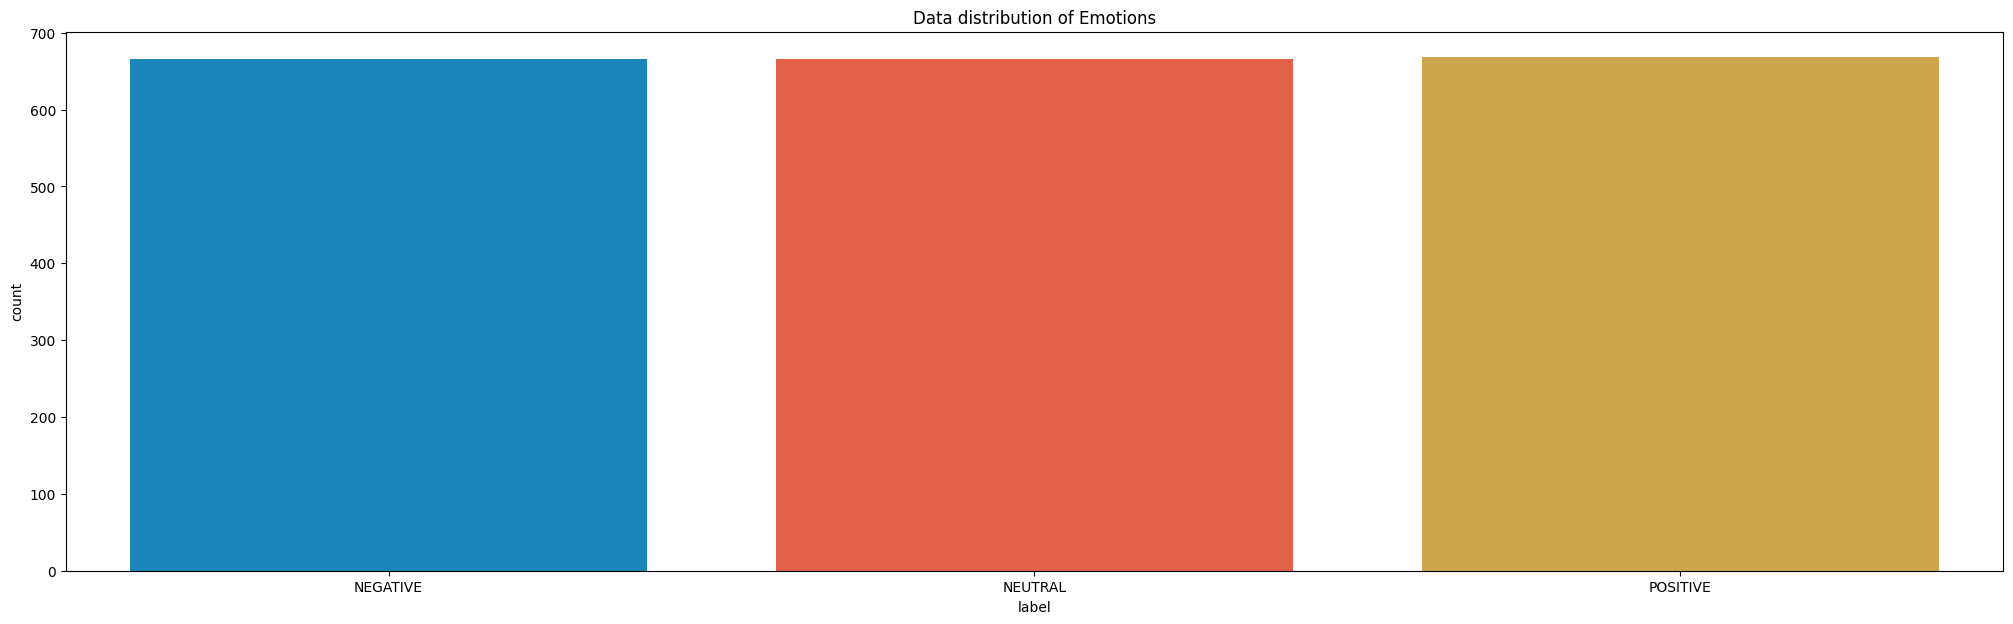

In [6]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

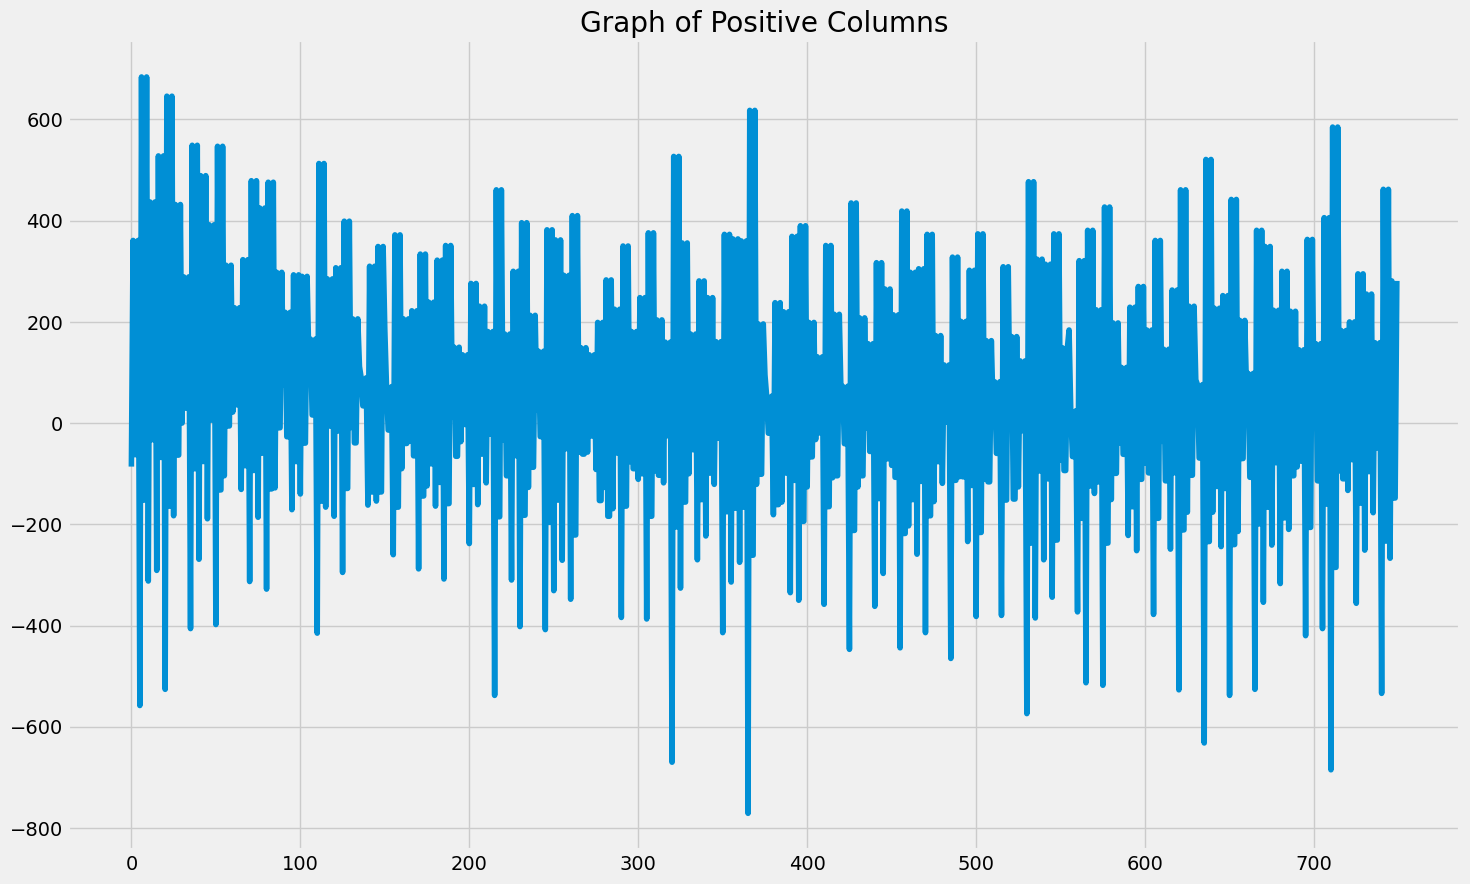

'As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'

In [7]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'''

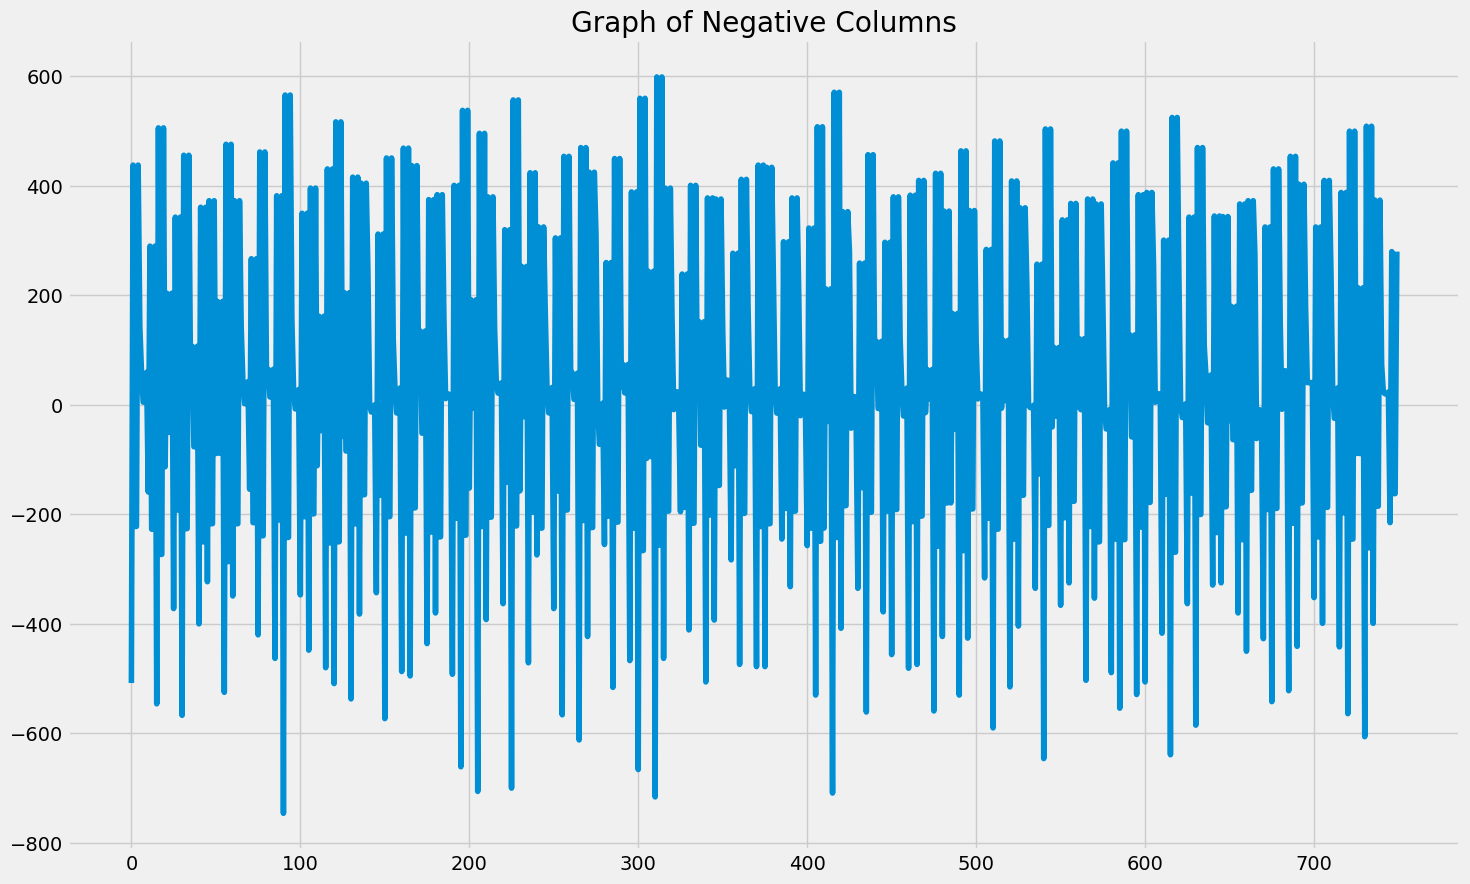

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [8]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

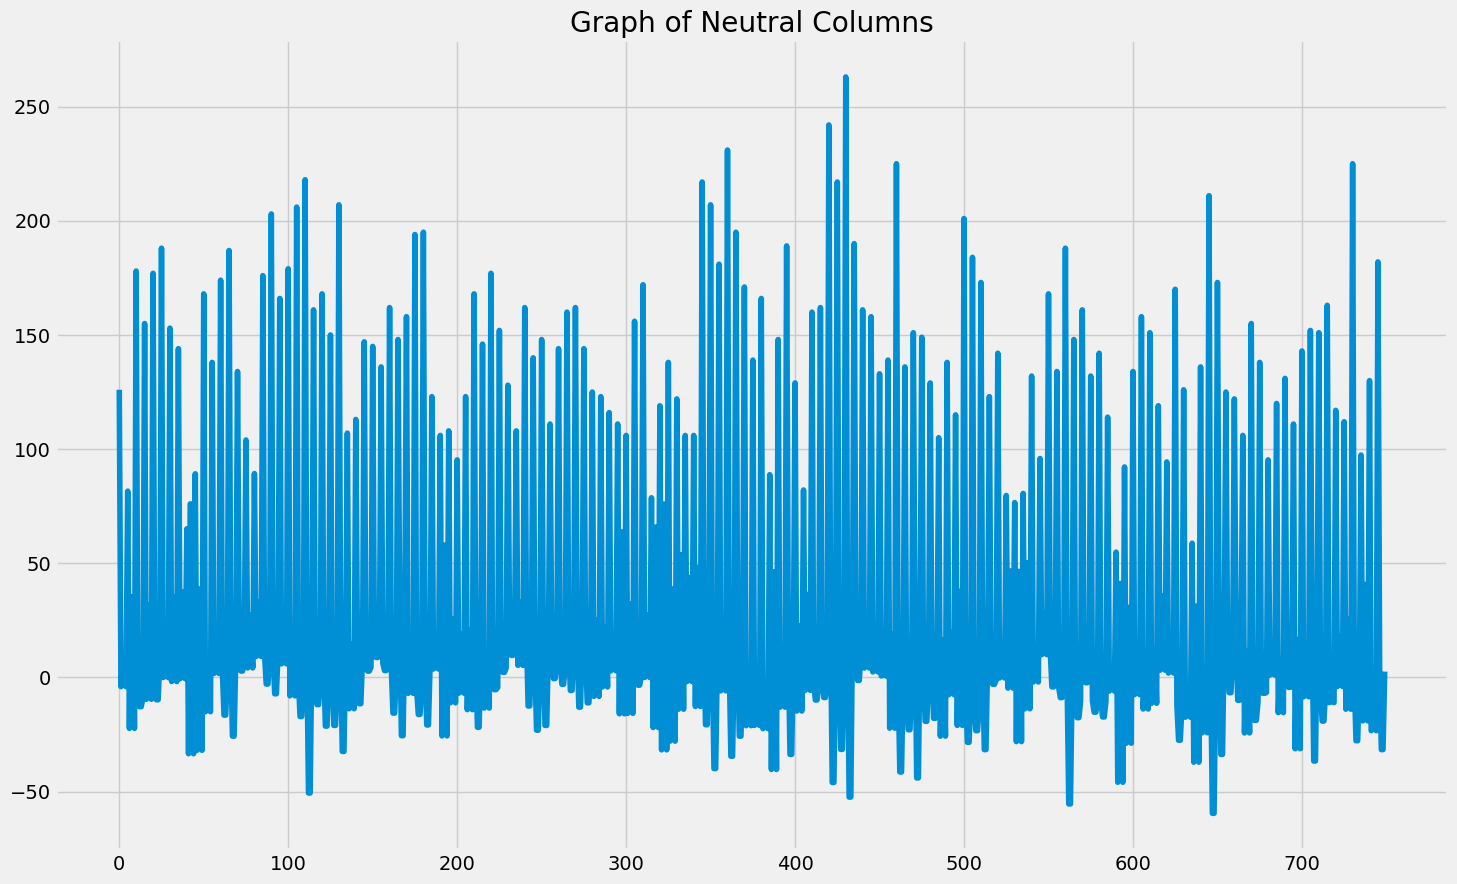

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [9]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()
'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

In [10]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [11]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [12]:
#checking shape of dataset
x_train.shape[1]

2548

In [13]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [14]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2023-01-30 03:29:14.715967: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-01-30 03:29:15.020210: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-30 03:29:15.020258: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tesispc): /proc/driver/nvidia/version does not exist
2023-01-30 03:29:15.021622: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 03:29:15.029344: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2593905000 Hz
2023-01-30 03:29:15.029647: I tens

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
tf_op_layer_ExpandDims (Tens [(None, 2548, 1)]         0         
_________________________________________________________________
gru (GRU)                    (None, 2548, 256)         198912    
_________________________________________________________________
flatten (Flatten)            (None, 652288)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1956867   
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
45/45 [==============================] - 129s 3s/step - loss: 0.6392 - accuracy: 0.8514 - val_loss: 0.3831 - val_accuracy: 0.8750
Epoch 2/10
45/45 [==============================] - 124s 3s/step - loss: 0.2346 - accuracy: 0.9229 - val_loss: 0.2768 - val_accuracy: 0.8938
Epoch 3/10
45/45 [==============================] - 126s 3s/step - loss: 0.1152 - accuracy: 0.9576 - val_loss: 0.1022 - val_accuracy: 0.9563
Epoch 4/10
45/45 [==============================] - 123s 3s/step - loss: 0.1219 - accuracy: 0.9632 - val_loss: 0.1909 - val_accuracy: 0.9125
Epoch 5/10
45/45 [==============================] - 109s 2s/step - loss: 0.0760 - accuracy: 0.9743 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 6/10
45/45 [==============================] - 107s 2s/step - loss: 0.0364 - accuracy: 0.9903 -

In [16]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 14.487047493457794 
Accuracy on Training: 97.25000262260437


In [17]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

In [18]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [20]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [21]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [2 1 2 0 0 1 1 1 0 0]


Actual:  [2 1 2 0 0 1 1 1 0 0]


Confusion matrix, without normalization
[[148   1   0]
 [  2 113   5]
 [  1   2 128]]


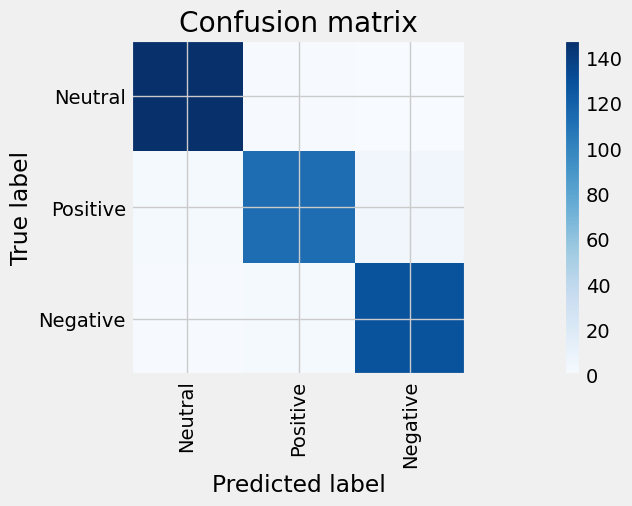

In [22]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [23]:
names1 = ["Neutral","Positive","Negative"]


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.68      0.96      0.79       149
           1       0.46      0.34      0.39       120
           2       0.89      0.68      0.77       131

    accuracy                           0.68       400
   macro avg       0.68      0.66      0.65       400
weighted avg       0.68      0.68      0.67       400


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.97      0.93      0.94       120
           2       0.96      0.98      0.97       131

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.96      0.92 

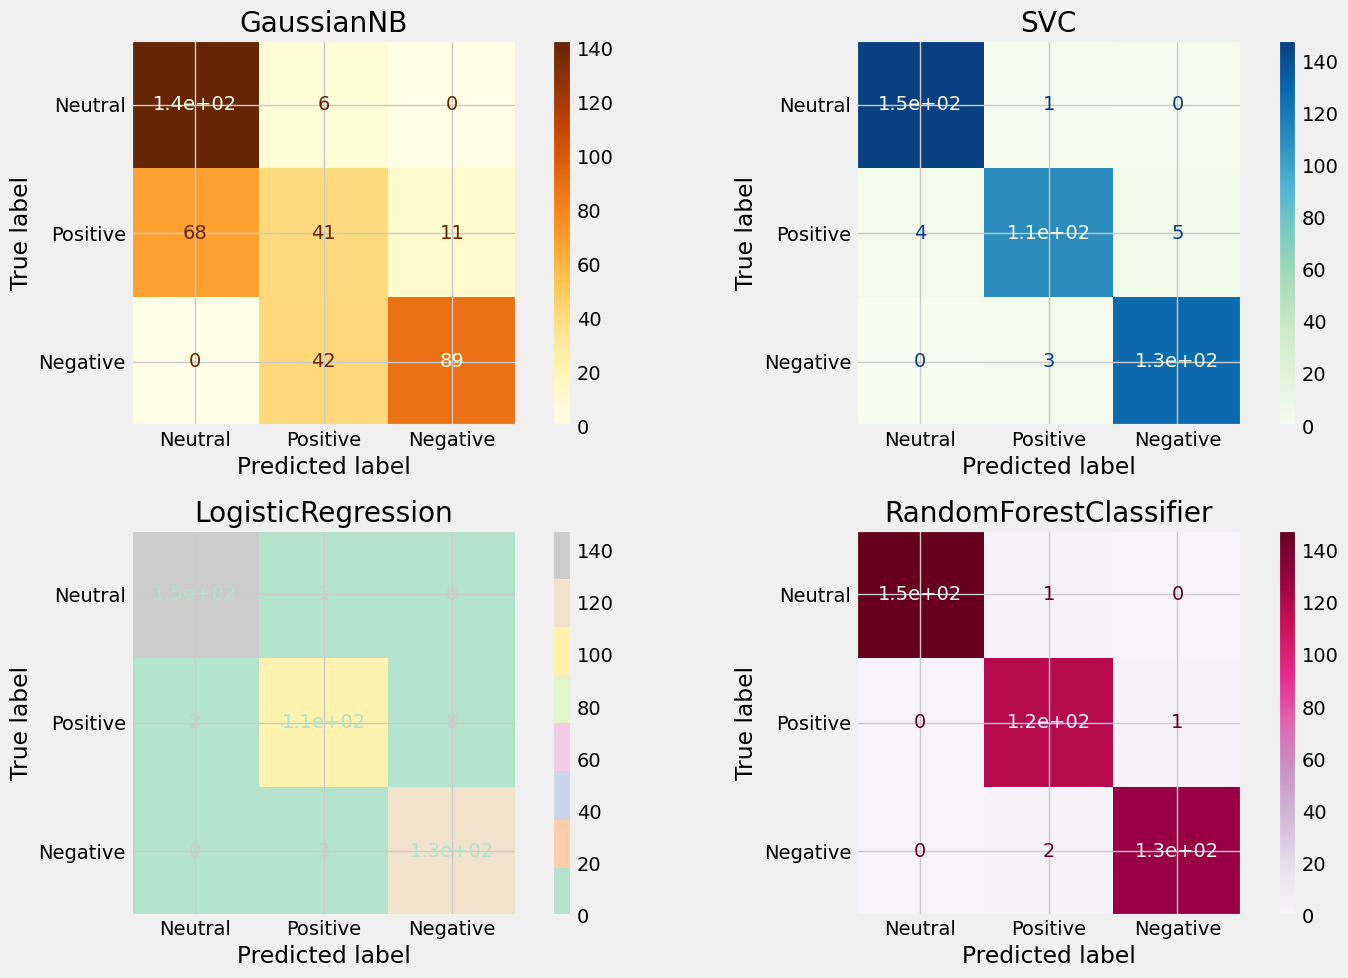

In [24]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import plot_confusion_matrix
for cls in classifiers:
    cls.fit(x_train,np.argmax(y_train,axis=1))
    
colors = [ 'YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, ax,c in zip(classifiers, axes.flatten(),colors):
    plot_confusion_matrix(cls, 
                          x_test, 
                          np.argmax(y_test,axis=1), 
                          ax=ax, 
                          cmap=c,
                         display_labels= names1)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()


In [25]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))


*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       149
           1       0.97      0.94      0.96       120
           2       0.96      0.98      0.97       131

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



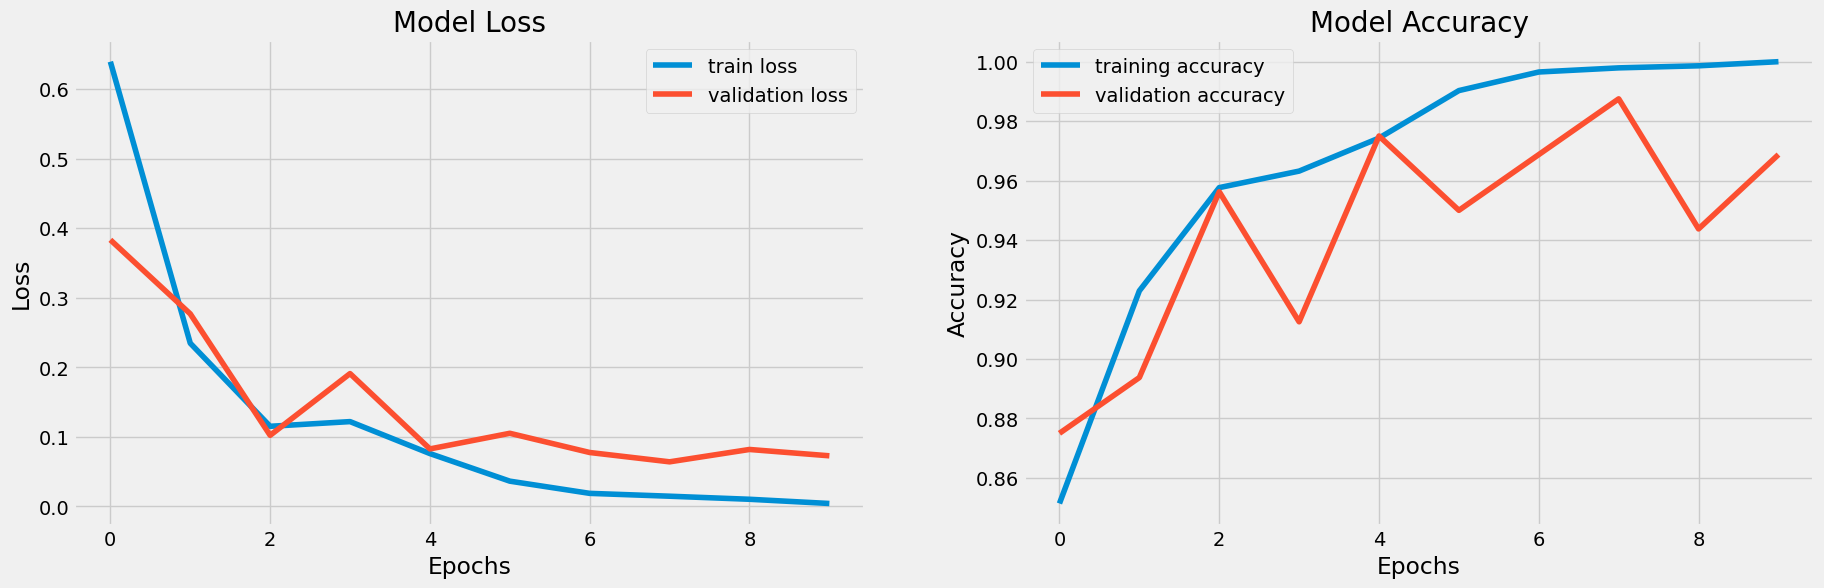

In [26]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [27]:
# Save the model to a file
lstmmodel.save("./eeg_brain_signals_model2/lst_classifier")
lstmmodel.save_weights("./eeg_brain_signals_model2/lst_classifier_weights.h5")

# Serialize the model
gnb_pickle = pickle.dumps(Classifier_gnb)
svm_pickle = pickle.dumps(Classifier_svm)
lr_pickle = pickle.dumps(Classifier_LR)
dt_pickle = pickle.dumps(Classifier_dt)
forest_pickle = pickle.dumps(Classifier_forest)

# Save the serialized model to a file
with open("./eeg_brain_signals_model2/gnb_classifier.pkl", "wb") as file:
    file.write(gnb_pickle)

with open("./eeg_brain_signals_model2/svm_classifier.pkl", "wb") as file:
    file.write(svm_pickle)

with open("./eeg_brain_signals_model2/lr_classifier.pkl", "wb") as file:
    file.write(lr_pickle)

with open("./eeg_brain_signals_model2/dt_classifier.pkl", "wb") as file:
    file.write(dt_pickle)

with open("./eeg_brain_signals_model2/forest_classifier.pkl", "wb") as file:
    file.write(forest_pickle)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./eeg_brain_signals_model2/lst_classifier/assets


In [28]:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /anaconda/envs/azureml_py38/lib/python3.8/site-packages
Requires: scipy, gast, numpy, protobuf, wheel, astunparse, six, absl-py, grpcio, google-pasta, termcolor, tensorboard, wrapt, keras-preprocessing, opt-einsum, tensorflow-estimator, h5py
Required-by: autokeras
